# **Importar** las bibliotecas necesarias

> Instalar librerias con el siguiente comando:  `pip install -r requirements.txt`

In [6]:
import pandas as pd
import requests

# Google Driver
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2 import service_account
import json



import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
import os

# Paso 1: Descargar el conjunto de datos

In [ ]:
# URL del archivo comprimido
url = "https://archive.ics.uci.edu/static/public/502/online+retail+ii.zip"

# Descargar el archivo y descomprimirlo
with requests.get(url) as r:
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall(path="./prueba_i2ds/")

# Ahora los archivos están descomprimidos en la ruta "./prueba_i2ds/" y listos para ser utilizados


# Paso 2: Conexión a Google Drive y Google Sheets

- Subir archvio a Google Drive

In [ ]:
# Leer el contenido del archivo JSON
with open("./client_secrets.json", "r") as json_file:
    json_content = json.load(json_file)


# Credenciales de servicio
credentials = service_account.Credentials.from_service_account_info(
    json_content, scopes=['https://www.googleapis.com/auth/drive']
)

# Crear el servicio de Google Drive
drive_service = build('drive', 'v3', credentials=credentials)

# ID de la carpeta "prueba i2ds" en Google Drive
folder_id = '1FdyTzg04CGQCdPBJ5IeDjTDBH-o8oaRn'

# Ruta local al archivo que deseas subir
local_file_path = './prueba_i2ds/online_retail_II.xlsx'

# Metadata del archivo
file_metadata = {
    'name': 'online_retail_data.xlsx',
    'parents': [folder_id]
}

# Subir el archivo a Google Drive
media = MediaFileUpload(local_file_path, mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')
file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

print('Archivo subido con éxito a Google Drive en la carpeta "prueba i2ds"')


- Leer el archivo .xlsx

In [ ]:
# Leer el archivo desde Google Sheets y convertirlo a un DataFrame
spreadsheet_id = 'YOUR_SPREADSHEET_ID_HERE'  # Reemplazar con el ID de la hoja de cálculo
range_name = 'Sheet1'  # Reemplazar con el nombre de la hoja de cálculo
sheet = build('sheets', 'v4', credentials=credentials).spreadsheets()
result = sheet.values().get(spreadsheetId=spreadsheet_id, range=range_name).execute()
values = result.get('values', [])

df = pd.DataFrame(values[1:], columns=values[0])  # Crear el DataFrame desde los datos de Google Sheets

# Paso 3: Manipulación de Datos con Pandas

In [47]:
# Filtrado
df = pd.read_excel("./prueba_i2ds/online_retail_II.xlsx")
df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [56]:
# Determinar el país que más productos consume
country_consumption = df.groupby('Country')['Quantity'].sum()[:11]
country_consumption

Country
Australia           20053
Austria              6479
Bahrain              1015
Belgium             11980
Bermuda              2798
Brazil                189
Canada                894
Channel Islands     10994
Cyprus               4371
Denmark            227030
EIRE               188704
Name: Quantity, dtype: int64

In [58]:
# Identificar los productos más vendidos
popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products

Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
60 TEATIME FAIRY CAKE CASES           36326
PACK OF 60 PINK PAISLEY CAKE CASES    31822
JUMBO BAG RED RETROSPOT               30727
SMALL POPCORN HOLDER                  29500
STRAWBERRY CERAMIC TRINKET BOX        26563
Name: Quantity, dtype: int64

# Paso 4: Visualización de Datos con Matplotlib y Seaborn

C:\Users\jonzn\AppData\Local\Temp\ipykernel_11336\409291703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")


Text(0.5, 1.0, 'Productos Más Vendidos')

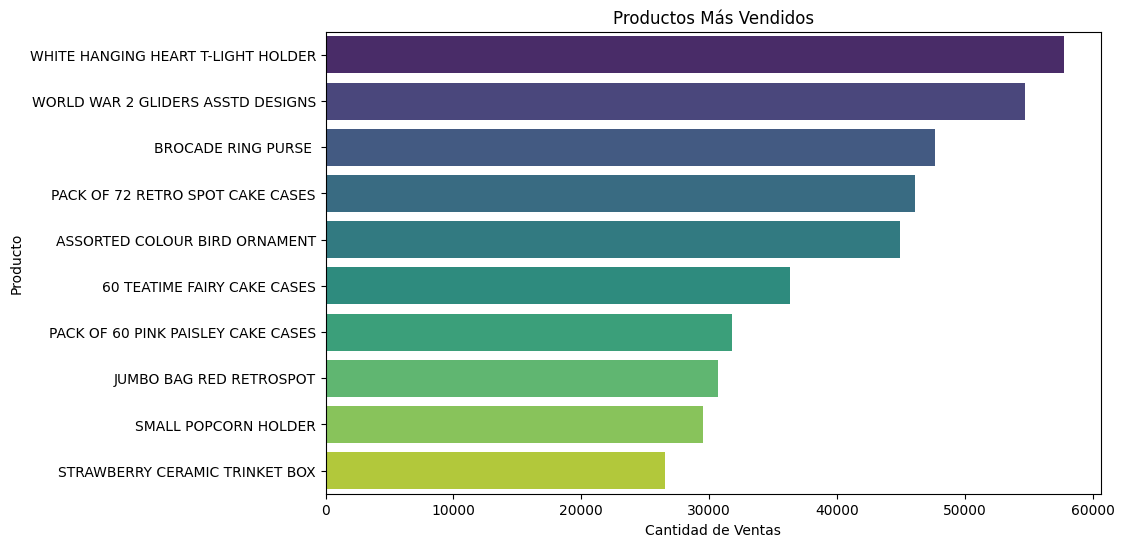

In [64]:
# Visualización de los productos más vendidos
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Producto')
plt.title('Productos Más Vendidos')
